In [28]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('log.csv')
df.head()

,cycle,mode,ball_x,ball_y,ball_vx,ball_vy,ball_area,my_x,my_y,my_vx,...,opp_player_4_kick,opp_player_4_dist,opp_player_4_area,opp_player_5_x,opp_player_5_y,opp_player_5_vx,opp_player_5_vy,opp_player_5_kick,opp_player_5_dist,opp_player_5_area
0,421,play_on,-26.4266,-28.4263,-1.8165,0.4374,1,-40.6874,-5.3881,-0.0766,...,0,29.220594,0,-20.7132,-29.4389,-0.2120,0.0566,0,31.263551,0
1,422,play_on,-28.2004,-27.9994,-1.6675,0.4013,1,-40.9578,-6.1488,-0.1082,...,0,29.738884,0,-21.4979,-29.2106,-0.2911,0.0847,0,30.175061,0
2,423,play_on,-29.8278,-27.5923,-1.5297,0.3826,1,-41.2283,-7.0106,-0.1082,...,0,28.885839,0,-22.9478,17.4070,-0.0603,0.0012,0,30.502391,0
3,424,play_on,-31.3757,-27.2134,-1.4551,0.3562,1,-41.5153,-7.9394,-0.1148,...,0,28.603467,0,-23.4223,16.9508,-0.1954,-0.1878,0,30.771394,0
4,425,play_on,-32.8175,-26.8181,-1.3553,0.3716,1,-41.8329,-8.7905,-0.1270,...,0,28.318141,0,-23.9871,16.3070,-0.2325,-0.2650,0,30.795407,0


one-hot encode the mode column

In [30]:
df = pd.get_dummies(df, columns=['mode']).astype('float32')
df = df.astype('float32')
df = df.drop('cycle', axis=1)
df.head()

,ball_x,ball_y,ball_vx,ball_vy,ball_area,my_x,my_y,my_vx,my_vy,my_dash_power,...,mode_foul_charge_r,mode_free_kick_l,mode_free_kick_r,mode_goal_kick_l,mode_goal_r,mode_indirect_free_kick_r,mode_kick_in_l,mode_kick_in_r,mode_offside_r,mode_play_on
0,-26.426600,-28.426300,-1.8165,0.4374,1.0,-40.687401,-5.3881,-0.0766,-0.2327,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-28.200399,-27.999399,-1.6675,0.4013,1.0,-40.957802,-6.1488,-0.1082,-0.3043,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-29.827801,-27.592300,-1.5297,0.3826,1.0,-41.228298,-7.0106,-0.1082,-0.3447,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-31.375700,-27.213400,-1.4551,0.3562,1.0,-41.515301,-7.9394,-0.1148,-0.3715,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-32.817501,-26.818100,-1.3553,0.3716,1.0,-41.832901,-8.7905,-0.1270,-0.3404,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


normalize the data

In [31]:
for col in df.columns:
    if col != 'my_dash_power' and col != 'my_dash_dir' and col != 'my_turn':
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

split the data into train and test

In [32]:
train = df.sample(frac=0.8, random_state=200)

split the data into train and validation

In [33]:
validation = df.drop(train.index)
train.head()

,ball_x,ball_y,ball_vx,ball_vy,ball_area,my_x,my_y,my_vx,my_vy,my_dash_power,...,mode_foul_charge_r,mode_free_kick_l,mode_free_kick_r,mode_goal_kick_l,mode_goal_r,mode_indirect_free_kick_r,mode_kick_in_l,mode_kick_in_r,mode_offside_r,mode_play_on
71589,0.971587,0.699369,0.375538,0.487628,0.333333,0.429493,0.632545,0.345225,0.460793,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34897,0.145410,0.846977,0.484202,0.407590,0.666667,0.126713,0.643489,0.502596,0.496011,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
71431,0.229355,0.998804,0.494190,0.501477,0.666667,0.143500,0.645084,0.502596,0.496011,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41764,0.875269,0.806967,0.700593,0.245082,0.333333,0.261055,0.609565,0.570558,0.461249,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7596,0.998483,0.001081,0.494190,0.501477,0.333333,0.333459,0.416931,0.355724,0.492706,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


add layers to the model

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(len(df.columns) - 3,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='linear')
])

In [36]:
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

In [37]:
model.fit(train.drop(columns=['my_dash_power', 'my_dash_dir', 'my_turn'], axis=1), train.loc[:,['my_dash_power', 'my_dash_dir', 'my_turn']], epochs=70, validation_data=(validation.drop(['my_dash_power', 'my_dash_dir', 'my_turn'], axis=1), validation.loc[:,['my_dash_power', 'my_dash_dir', 'my_turn']]))

Epoch 1/70
2002/2002 [==============================] - 4s 2ms/step - loss: 1592.0815 - mae: 17.5675 - mse: 1592.0815 - val_loss: 1506.5320 - val_mae: 16.5004 - val_mse: 1506.5320
Epoch 2/70
2002/2002 [==============================] - 3s 2ms/step - loss: 1530.6749 - mae: 16.3904 - mse: 1530.6749 - val_loss: 1478.4060 - val_mae: 15.5904 - val_mse: 1478.4060
Epoch 3/70
2002/2002 [==============================] - 3s 2ms/step - loss: 1502.5580 - mae: 15.8574 - mse: 1502.5580 - val_loss: 1464.2551 - val_mae: 15.0871 - val_mse: 1464.2551
Epoch 4/70
2002/2002 [==============================] - 4s 2ms/step - loss: 1491.1028 - mae: 15.6475 - mse: 1491.1028 - val_loss: 1459.3275 - val_mae: 15.5383 - val_mse: 1459.3275
Epoch 5/70
2002/2002 [==============================] - 3s 2ms/step - loss: 1483.5203 - mae: 15.4860 - mse: 1483.5203 - val_loss: 1445.9255 - val_mae: 15.2485 - val_mse: 1445.9255
Epoch 6/70
2002/2002 [==============================] - 3s 2ms/step - loss: 1476.2069 - mae: 15.3631

plot the loss

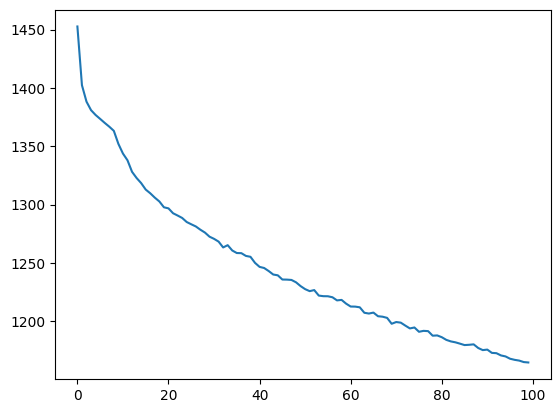

In [188]:
plt.plot(model.history.history['loss'])

plot the validation loss

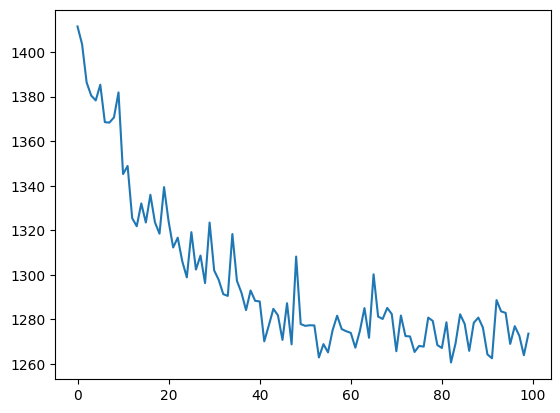

In [189]:
plt.plot(model.history.history['val_loss'])

plot the mean absolute error

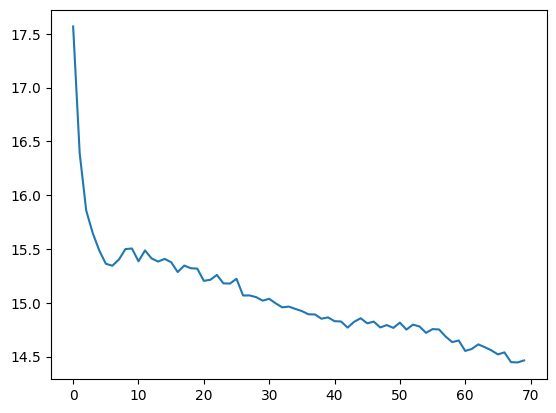

In [39]:
plt.plot(model.history.history['mae'])

plot the validation mean absolute error

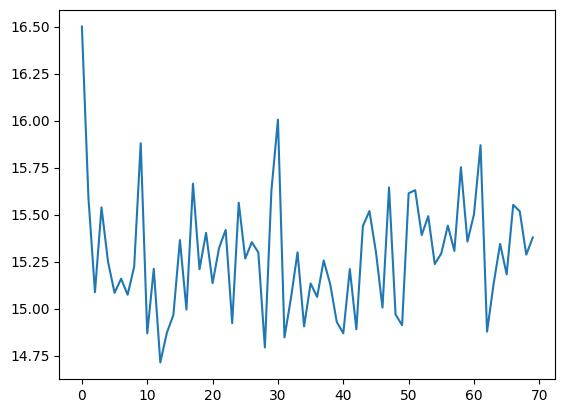

In [41]:
plt.plot(model.history.history['val_mae'])

In [190]:
model.save('model.h5')

/Users/hasan/Documents/final-project/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [191]:
model.evaluate(validation.drop(['my_dash_power', 'my_dash_dir', 'my_turn'], axis=1), validation.loc[:,['my_dash_power', 'my_dash_dir', 'my_turn']])

1508/1508 [==============================] - 1s 638us/step - loss: 1273.5541


1273.5540771484375

In [241]:
result = model.predict(validation.drop(['my_dash_power', 'my_dash_dir', 'my_turn'], axis=1))

1508/1508 [==============================] - 1s 326us/step


In [243]:
result_df = pd.DataFrame(result, columns=['my_dash_power', 'my_dash_dir', 'my_turn'])

In [244]:
result_df.head(3)

,my_dash_power,my_dash_dir,my_turn
0,87.808815,-0.006646,-0.971444
1,97.032539,1.112755,-5.281590
2,73.655289,4.603970,-7.903185


save in result.csv

In [245]:
result_df.to_csv('result.csv', index=False)